In [96]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Load the dataset from a CSV file
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [98]:
import seaborn as sns

sns.catplot(x='v1', kind='count', data=df)

In [99]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [100]:
# Rename the columns to 'label' and 'text'
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

df.columns

Index(['label', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [101]:
df.shape

(5572, 5)

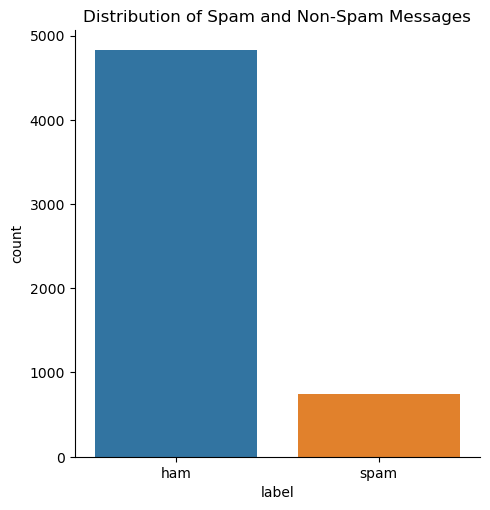

In [102]:
# Visualize the distribution of spam and non-spam messages
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Non-Spam Messages')
plt.show()

In [103]:
# Convert the labels to numerical values
df['label'] = np.where(df['label'] == 'spam', 1, 0)

In [104]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

<AxesSubplot:>

In [105]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=0)

In [106]:
# Extract features using the CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train.astype('U'))
X_test = cv.transform(X_test.astype('U'))

In [107]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [108]:
# Test the Naive Bayes model
nb_predictions = nb_model.predict(X_test)

In [109]:
# Calculate the accuracy score and confusion matrix for the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_cm = confusion_matrix(y_test, nb_predictions)
print(accuracy_score(y_test, nb_predictions)*100)
print(confusion_matrix(y_test, nb_predictions))


98.63603732950466
[[1193    3]
 [  16  181]]


In [110]:
# Train the SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [111]:
# Test the SVM model
svm_predictions = svm_model.predict(X_test)

In [112]:
# Calculate the accuracy score and confusion matrix for the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)
print(accuracy_score(y_test, svm_predictions)*100)
print(confusion_matrix(y_test, svm_predictions))

98.34888729361091
[[1193    3]
 [  20  177]]


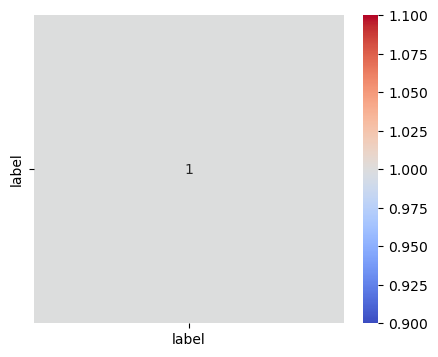

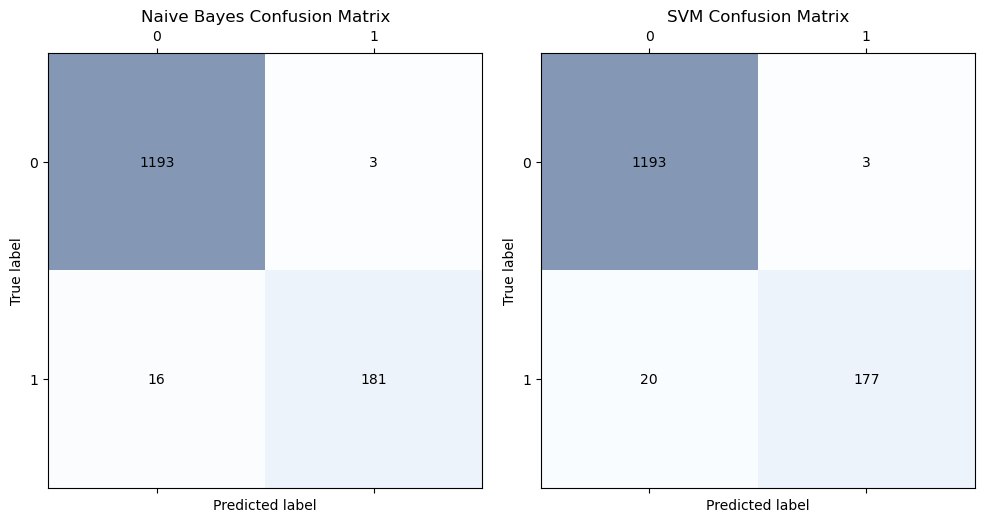

In [113]:
# Plot the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(nb_cm, cmap='Blues', alpha=0.5)
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
for i in range(nb_cm.shape[0]):
    for j in range(nb_cm.shape[1]):
        ax[0].text(x=j, y=i, s=nb_cm[i, j], va='center', ha='center')
ax[1].matshow(svm_cm, cmap='Blues', alpha=0.5)
ax[1].set_title('SVM Confusion Matrix')
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
for i in range(svm_cm.shape[0]):
    for j in range(svm_cm.shape[1]):
        ax[1].text(x=j, y=i, s=svm_cm[i, j], va='center', ha='center')
plt.tight_layout()
plt.show()


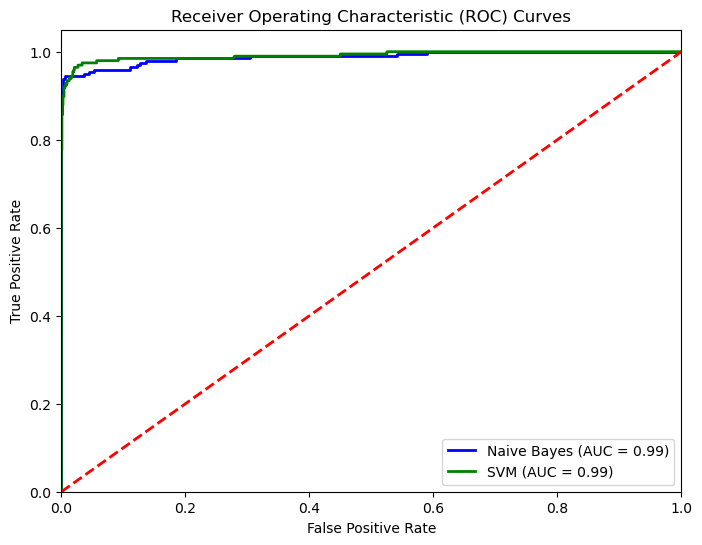

In [114]:
# Predict on the test set using both models
nb_predictions = nb_model.predict_proba(X_test)[:, 1]
svm_predictions = svm_model.decision_function(X_test)

# Compute false positive rate, true positive rate, and thresholds for both models
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_predictions)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_predictions)

# Compute area under the curve (AUC) for both models
nb_auc = auc(nb_fpr, nb_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()